In [1]:
pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117Note: you may need to restart the kernel to use updated packages.


[notice] A new release of pip available: 22.1.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install transformers requests beautifulsoup4



[notice] A new release of pip available: 22.1.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import requests
from bs4 import BeautifulSoup
import re

In [4]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

In [93]:
tokens = tokenizer.encode('Wow... Loved this place.', return_tensors='pt')

In [94]:
tokens

tensor([[  101, 94608,   119,   119,   119, 46747, 10372, 11125,   119,   102]])

In [95]:
result = model(tokens)

In [96]:
result

SequenceClassifierOutput(loss=None, logits=tensor([[-2.0983, -2.5914, -0.9171,  1.1801,  3.5911]],
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [97]:
result.logits

tensor([[-2.0983, -2.5914, -0.9171,  1.1801,  3.5911]],
       grad_fn=<AddmmBackward0>)

In [98]:
int(torch.argmax(result.logits))+1

5

In [78]:
'''r = requests.get('https://www.youtube.com/watch?v=Rj8OvE_1-q0')
soup = BeautifulSoup(r.text, 'html.parser')
regex = re.compile('.*comment.*')
results = soup.find_all('p', {'class':regex})
reviews = [result.text for result in results]

SyntaxError: unterminated triple-quoted string literal (detected at line 5) (674875514.py, line 1)

In [79]:
dataset = pd.read_csv('C:/Users/Christopher Ogbeide/Desktop/data/Restaurant_Reviews (2).tsv', delimiter = '\t', quoting = 3)

In [80]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [82]:
 df = pd.DataFrame(dataset, columns=['Review'])

In [83]:
df['Review'].iloc[0]

'Wow... Loved this place.'

In [91]:
def sentiment_score(Review):
    tokens = tokenizer.encode(Review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [99]:
sentiment_score(df['Review'].iloc[0])

5

In [89]:
df['sentiment'] = df['Review'].apply(lambda x: sentiment_score(x[:512]))

In [90]:
df

,Review,sentiment
0,Wow... Loved this place.,5
1,Crust is not good.,2
2,Not tasty and the texture was just nasty.,2
3,Stopped by during the late May bank holiday of...,5
4,The selection on the menu was great and so wer...,5
...,...,...
995,I think food should have flavor and texture an...,2
996,Appetite instantly gone.,1
997,Overall I was not impressed and would not go b...,2
998,"The whole experience was underwhelming, and I ...",2


In [100]:
df['Review'].iloc[3]

'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'

In [103]:
import matplotlib.pyplot as plt

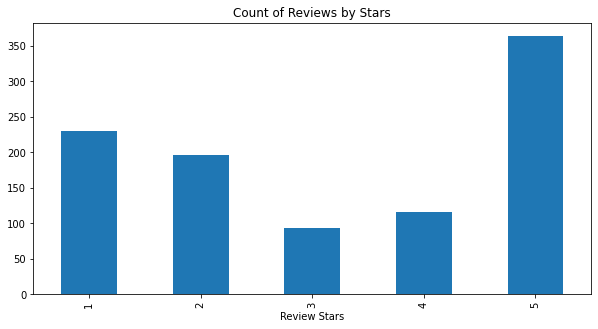

In [104]:
ax = df['sentiment'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [107]:
import seaborn as sns

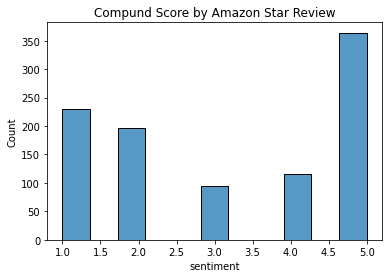

In [140]:
#ax1 = sns.barplot(data=df.sentiment[1])
ax1 = sns.histplot(data=df['sentiment'])
ax1.set_title('Compund Score by Amazon Star Review')
plt.show()

NameError: name 'sentiment' is not defined

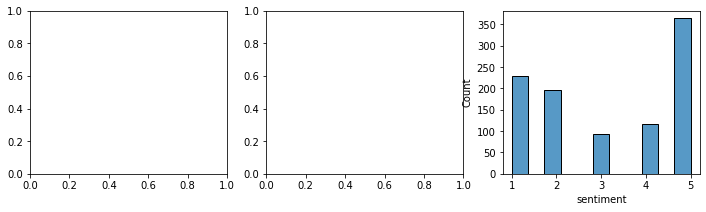

In [139]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.histplot(data=df['sentiment'])
sns.histplot(data=df['sentiment'], x=5, y=sentiment, ax=axs[2])
sns.barplot(data=df['sentiment'], x='sentiment', y='3', ax=axs[3])
sns.barplot(data=df['sentiment'], x='sentiment', y='4', ax=axs[4])
sns.barplot(data=df['sentiment'], x='sentiment', y='5', ax=axs[5])
axs[1].set_title('1')
axs[2].set_title('2')
axs[3].set_title('3')
axs[4].set_title('4')
axs[5].set_title('5')
plt.tight_layout()
plt.show()